In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import nltk

# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
# !unzip -q "/content/drive/MyDrive/Women's files -20231119T153505Z-001.zip"
! unzip -q "/content/Women_s files.zip"

In [ ]:
DATASET_DIR="/content/Women_s files"
docs=os.listdir(DATASET_DIR)

In [ ]:
len(docs)

177

# Data Preprocessing

In [ ]:
#lower casing
def lower_cased(sentences):
  for i in range(len(sentences)):
      sentences[i] = sentences[i].lower()
  return sentences


# sentences=lower_cased(sentences)

In [ ]:
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')

def remove_punctuation(sentences):
    cleaned_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        words_without_punct = [word for word in words if word not in string.punctuation]
        sentence_without_punct = ' '.join(words_without_punct)
        cleaned_sentences.append(sentence_without_punct)

    return cleaned_sentences


# sentences=remove_punctuation(sentences)
# print(sentences[0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(sentences):
    stop_words = set(stopwords.words('english'))
    filtered_sentences = []

    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        filtered_sentence = [word for word in words if word.lower() not in stop_words]
        filtered_sentences.append(' '.join(filtered_sentence))

    return filtered_sentences

# sentences=remove_stopwords(sentences)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def PreprocessingLayer(sentences: list[str]):
  sentences=lower_cased(sentences)
  sentences=remove_punctuation(sentences)
  sentences=remove_stopwords(sentences)
  return sentences



### Word2Vec

In [ ]:
Y=pd.read_csv("/content/legalBuddy - Sheet6.csv")
NUM_CLASSES=Y.shape[1]-1
CLASSES=Y.columns[1:]

In [ ]:
CLASSES

Index(['POCSO-2012', 'IPC-509', 'IPC-504', 'IPC-354', 'IPC-354A', 'IPC-498A',
       'IPC-302', 'IPC-376', 'DPA', 'DVA', 'IPC-34', 'IPC 307', 'IPC 313',
       'IPC 109', 'IPC 324', 'IPC 326', 'IPC 323'],
      dtype='object')

In [ ]:
Y

,Doc Name,POCSO-2012,IPC-509,IPC-504,IPC-354,IPC-354A,IPC-498A,IPC-302,IPC-376,DPA,DVA,IPC-34,IPC 307,IPC 313,IPC 109,IPC 324,IPC 326,IPC 323
0,women_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,women_2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,women_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,women_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,women_5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,aa_14_aug_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
174,aa_3_aug_1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
175,aa_3_aug_2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
176,aa_3_aug_3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
docs=[]
for doc in Y.iloc[:-1,0]:
  file=doc+".txt"
  docs.append(file)
docs

['women_1.txt',
 'women_2.txt',
 'women_3.txt',
 'women_4.txt',
 'women_5.txt',
 'women_6.txt',
 'women_7.txt',
 'women_8.txt',
 'women_9.txt',
 'women_10.txt',
 'aa_1.txt',
 'aa_2.txt',
 'aa_3.txt',
 'aa_4.txt',
 'aa_5.txt',
 'aa_6.txt',
 'aa_7.txt',
 'aa_8.txt',
 'aa_9.txt',
 'aa_10.txt',
 'aa_11.txt',
 'aa_12.txt',
 'aa_13.txt',
 'aa_14.txt',
 'aa_15.txt',
 'aa_16.txt',
 'aa_17.txt',
 'aa_18.txt',
 'aa_19.txt',
 'aa_20.txt',
 'aa_21.txt',
 'aa_22.txt',
 'aa_23.txt',
 'aa_24.txt',
 'aa_25.txt',
 'sh_1.txt',
 'sh_2.txt',
 'sh_3.txt',
 'sh_4.txt',
 'sh_5.txt',
 'sh_6.txt',
 'sh_7.txt',
 'sh_8.txt',
 'sh_9.txt',
 'sh_10.txt',
 'sh_11.txt',
 'sh_12.txt',
 'sh_13.txt',
 'sh_14.txt',
 'sh_15.txt',
 'sh_16.txt',
 'sh_17.txt',
 'sh_18.txt',
 'sh_19.txt',
 'sh_20.txt',
 'sh_21.txt',
 'sh_22.txt',
 'sh_23.txt',
 'sh_24.txt',
 'sh_25.txt',
 'aa_25_aug1.txt',
 'aa_25_aug2.txt',
 'aa_25_aug3.txt',
 'aa_25_aug4.txt',
 'sh_18_aug1.txt',
 'sh_18_aug2.txt',
 'sh_18_aug3.txt',
 'sh_18_aug4.txt',
 'wom

In [ ]:
len(docs)

177

In [ ]:
sentences=[]
for doc in docs:
  path=os.path.join(DATASET_DIR,doc)
  if(doc.endswith("txt")):
      file=open(path,"r")
      sentences.append(file.read())
      file.close()

In [ ]:
avg_len=0
total_words=0
max_len=0
for sent in sentences:
  words=sent.split()
  max_len=max(max_len,len(words))
  total_words+=len(words)

avg_len=total_words/len(sentences)
print("Average words in a report :",int(avg_len))
print("Max len :",int(max_len))
#150, 150 ,150

Average words in a report : 128
Max len : 826


In [ ]:
X=sentences
X=PreprocessingLayer(X)
X=np.array(X)
X.shape

(177,)

In [ ]:
from tensorflow.keras.layers import TextVectorization
MAX_VOCAB=10000
MAX_LEN=500

text_vectorizer=TextVectorization(max_tokens=MAX_VOCAB,
                                  output_mode="int",
                                  output_sequence_length=MAX_LEN,
                                  name="vectorization_layer"
                                  )
text_vectorizer.adapt(sentences)

In [ ]:
text_vectorizer(sentences[0])

<tf.Tensor: shape=(500,), dtype=int64, numpy=
array([   2,  226,   73,   11,   54,    2, 1453, 1584, 1974,   53,  532,
          2,   13,    6, 2541,  239,    7,   23, 1619,    2,   40,   11,
          7,    4, 1129,  271,   15, 1966,   29,   44,    4, 1597,   61,
          2,  439, 1660, 2252,    2,   40,  371,  231,   22,    8, 1038,
          9,   87,    2,  881,   34,   13, 1874, 1664,    8,   49,  291,
       1517,  694,    5,   49,  632,    6,    8,  140,    2,   40,   43,
         18,   96,    7,    2,   32,   13,   87,  136,    2,   34, 1219,
        467,    6,   56, 2798,    5,  468,    7, 2943,    3,    2, 1102,
          2,   40,  369,  454,    6,    2,   47,   13,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

### processing the target vector

In [ ]:
Y=Y.iloc[:-1,1:].values
Y.shape

(177, 17)

In [ ]:
from sklearn.model_selection import train_test_split
X_tr,X_ts,Y_tr,Y_ts=train_test_split(X,Y,test_size=0.2, random_state=42)
print(X_tr.shape,X_ts.shape,Y_tr.shape,Y_ts.shape,)

(141,) (36,) (141, 17) (36, 17)


# Modelling

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')

    plt.tight_layout()
    plt.show()


In [ ]:
from tensorflow.keras.layers import Embedding
embedding=Embedding(
    input_dim=MAX_VOCAB,
    output_dim=128,
    embeddings_initializer="uniform",
    input_length=MAX_LEN,
    name="embedding_layer"
)

### Model_1 LSTM

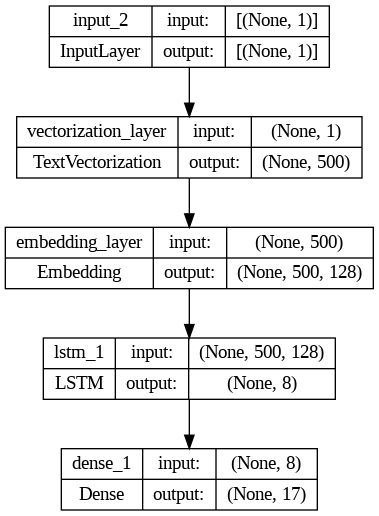

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.LSTM(8)(x)
outputs=layers.Dense(NUM_CLASSES,activation="softmax")(x)
model_1=tf.keras.Model(inputs,outputs,name="base_LSTM")
tf.keras.utils.plot_model(model_1,show_shapes=True)

In [ ]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adagrad(),
                metrics=["accuracy"])
model_1.summary()

Model: "base_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 vectorization_layer (TextV  (None, 500)               0         
 ectorization)                                                   
                                                                 
 embedding_layer (Embedding  (None, 500, 128)          1280000   
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 8)                 4384      
                                                                 
 dense_1 (Dense)             (None, 17)                153       
                                                                 
Total params: 1284537 (4.90 MB)
Trainable params: 1284537

Epoch 1/20
5/5 [==============================] - 7s 200ms/step - loss: 4.5977 - accuracy: 0.0355 - val_loss: 5.3421 - val_accuracy: 0.0278
Epoch 2/20
5/5 [==============================] - 0s 79ms/step - loss: 4.5957 - accuracy: 0.0355 - val_loss: 5.3413 - val_accuracy: 0.0278
Epoch 3/20
5/5 [==============================] - 0s 92ms/step - loss: 4.5940 - accuracy: 0.0355 - val_loss: 5.3406 - val_accuracy: 0.0278
Epoch 4/20
5/5 [==============================] - 0s 113ms/step - loss: 4.5922 - accuracy: 0.0355 - val_loss: 5.3402 - val_accuracy: 0.0278
Epoch 5/20
5/5 [==============================] - 1s 129ms/step - loss: 4.5907 - accuracy: 0.0355 - val_loss: 5.3395 - val_accuracy: 0.0278
Epoch 6/20
5/5 [==============================] - 0s 94ms/step - loss: 4.5892 - accuracy: 0.0355 - val_loss: 5.3391 - val_accuracy: 0.0278
Epoch 7/20
5/5 [==============================] - 1s 123ms/step - loss: 4.5878 - accuracy: 0.0355 - val_loss: 5.3387 - val_accuracy: 0.0278
Epoch 8/20
5/5 [=======

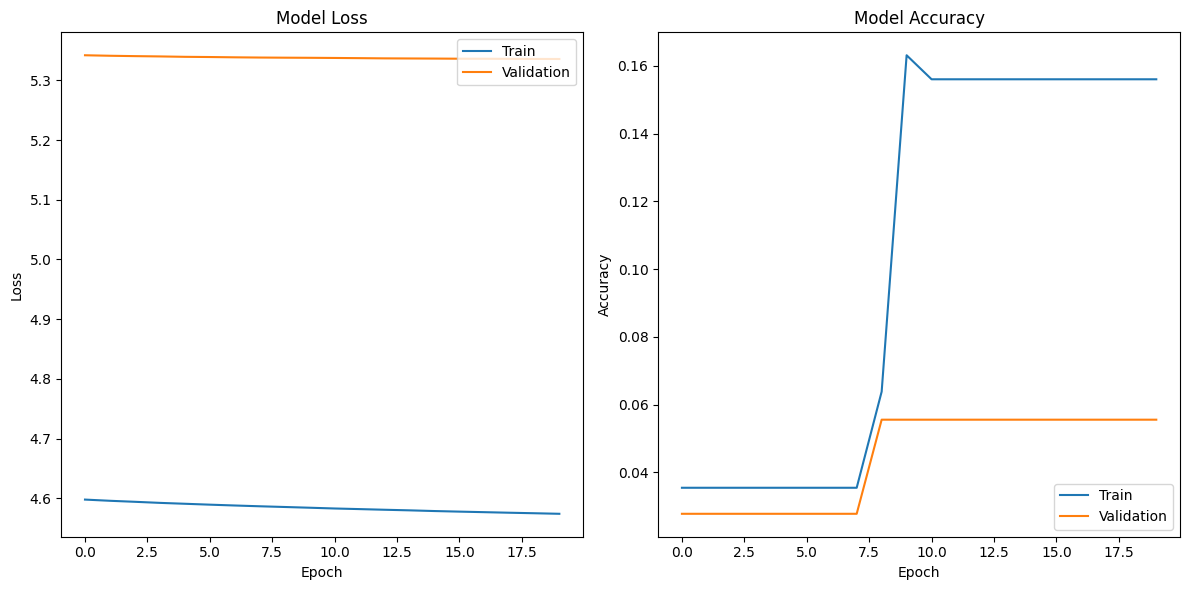

In [ ]:
model_1_history = model_1.fit(X_tr,Y_tr,
                              epochs=20,
                              validation_data=(X_ts,Y_ts)
                             )
plot_history(model_1_history)

### Model 2 :Transfer Learning ( Universal Sentence Encoder)

In [ ]:
import tensorflow_hub as hub
embed=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [ ]:
sentence_encoder_layer=hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[],
    dtype=tf.string,
    name="USE"
    )

In [ ]:
from tensorflow.keras import layers
model_2=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(17,activation="softmax")
],name="model_2_enc")

model_2.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
model_2.summary()

Model: "model_2_enc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_2 (Dense)             (None, 17)                8721      
                                                                 
Total params: 256806545 (979.64 MB)
Trainable params: 8721 (34.07 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


Epoch 1/120
5/5 [==============================] - 6s 148ms/step - loss: 4.5953 - accuracy: 0.0426 - val_loss: 5.2896 - val_accuracy: 0.1944
Epoch 2/120
5/5 [==============================] - 0s 29ms/step - loss: 4.5371 - accuracy: 0.1418 - val_loss: 5.2443 - val_accuracy: 0.2778
Epoch 3/120
5/5 [==============================] - 0s 28ms/step - loss: 4.4868 - accuracy: 0.2128 - val_loss: 5.2018 - val_accuracy: 0.3611
Epoch 4/120
5/5 [==============================] - 0s 38ms/step - loss: 4.4388 - accuracy: 0.3546 - val_loss: 5.1610 - val_accuracy: 0.3611
Epoch 5/120
5/5 [==============================] - 0s 39ms/step - loss: 4.3926 - accuracy: 0.4610 - val_loss: 5.1220 - val_accuracy: 0.4722
Epoch 6/120
5/5 [==============================] - 0s 28ms/step - loss: 4.3480 - accuracy: 0.4894 - val_loss: 5.0851 - val_accuracy: 0.5278
Epoch 7/120
5/5 [==============================] - 0s 27ms/step - loss: 4.3063 - accuracy: 0.5106 - val_loss: 5.0516 - val_accuracy: 0.5556
Epoch 8/120
5/5 [==

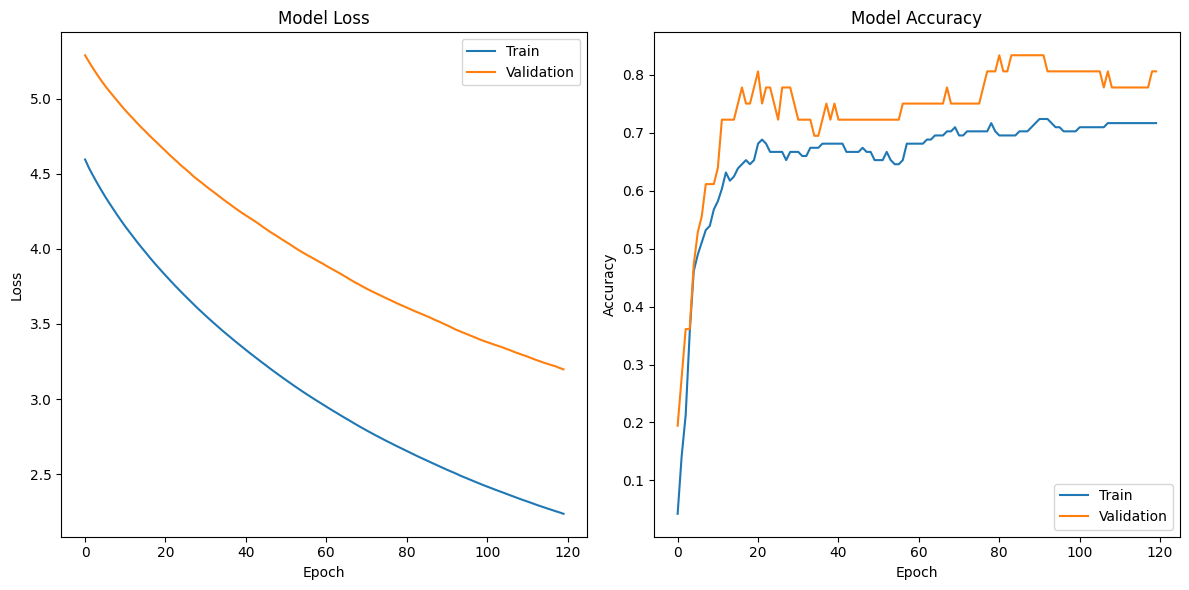

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
best_model_checkpoint = ModelCheckpoint("best.h5", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1)
last_model_checkpoint = ModelCheckpoint("last.h5", save_best_only=False, verbose=1)

model_2_history = model_2.fit(X_tr,Y_tr,
                              epochs=120,
                              validation_data=(X_ts,Y_ts),
                              # callbacks=[best_model_checkpoint, last_model_checkpoint]
                             )
plot_history(model_2_history)

In [ ]:
model_2.save("model_2(n% ts).h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluating Model

In [ ]:
def predict(case, model, classes):
    case = [case]
    case = PreprocessingLayer(case)
    pred = model.predict(case)[0]
    top5_indices = np.argsort(pred)[::-1][:5]
    top5_classes = classes[top5_indices]
    top5_probabilities = pred[top5_indices]
    print("\nTop 5 Predicted Classes:")
    for i in range(5):
        print(f"{i + 1}. Class: {top5_classes[i]}, Probability: {top5_probabilities[i]:.4f}")
    return top5_classes,top5_probabilities


### example 1

In [ ]:
case="""
Bengaluru: A man allegedly murdered a 16-year-old youth for reportedly harassing his
 in Ashoknagar’s Subbanna Garden area Monday. The deceased is David from Vinayakanagar in Wilson Garden, police said.
 The accused, Manjunath, a cab driver, allegedly hit David with an iron rod and stabbed him with a knife.
 Police said David and Manjunath’s daughter were in a relationship for four years.
 A year ago, Manjunath and his family members learned about it and advised her to avoid meeting David. She listened to her parents but David continued to approach her. As the
  intensified, Manjunath stopped sending his daughter to college and even shifted their residence from Vinayaka Nagar to Anepalya. David was forcing Manjunath to get him married to his daughter. He threatened to circulate the photos of him with his daughter, police said.
  Manjunath called David on Monday to meet him in Subbanna Garden to discuss the matter. He warned David not to trouble his daughter. A heated argument broke out and Manjunath attacked David. Police arrested Manjunath based on a complaint by David’s father Vishwa. tnn
"""
predict(case,model_2,CLASSES)

1/1 [==============================] - 0s 59ms/step

Top 5 Predicted Classes:
1. Class: POCSO-2012, Probability: 0.1788
2. Class: IPC-354A, Probability: 0.1492
3. Class: IPC-509, Probability: 0.1432
4. Class: IPC-354, Probability: 0.1174
5. Class: IPC-498A, Probability: 0.1082


(Index(['POCSO-2012', 'IPC-354A', 'IPC-509', 'IPC-354', 'IPC-498A'], dtype='object'),
 array([0.17883947, 0.14922935, 0.14324829, 0.11742987, 0.10823463],
       dtype=float32))

### example 2

In [ ]:
case="""
 have registered an offence against four of a family living in ,
 In her complaint, the woman said her husband and in-laws were demanding Rs 2 lakh balance amount towards the dowry.
"""
result,probabs=predict(case,model_2,CLASSES)

1/1 [==============================] - 0s 38ms/step

Top 5 Predicted Classes:
1. Class: IPC-498A, Probability: 0.4302
2. Class: DVA, Probability: 0.2150
3. Class: DPA, Probability: 0.1305
4. Class: IPC 323, Probability: 0.0558
5. Class: IPC-354A, Probability: 0.0291


### Model_3 LLM

In [ ]:
!pip install transformers

In [ ]:
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification

In [ ]:
tokenizer=DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
len(tokenizer(X[2])[0])

161

In [ ]:
X_tr_enc=[]
X_ts_enc=[]
for x in X_tr:
  X_tr_enc.append(tokenizer(x,truncation=True,padding=True))
for x in X_ts:
  X_ts_enc.append(tokenizer(x,truncation=True,padding=True))

print(len(X_tr_enc),len(X_ts_enc))

141 36


In [ ]:
X_tr=list(X_tr)
X_ts=list(X_ts)
type(X_tr)

list

In [ ]:
X_tr_enc=tokenizer(X_tr,truncation=True,padding=True)
X_ts_enc=tokenizer(X_t,truncation=True,padding=True)

In [ ]:
train_dataset=tf.keras.data.Dataset(dict())

In [ ]:
max_len = max(max_len_tr, max_len_ts)

print("Maximum sequence length:", max_len)

Maximum sequence length: 512


In [ ]:
train_dataset=tf.data.Dataset.from_tensor_slices([X_tr_enc,Y_tr])
test_dataset=tf.data.Dataset.from_tensor_slices([X_ts_enc,Y_ts])

ValueError: ignored

In [ ]:
bert_layer= TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

model_3 = tf.keras.Sequential([
    bert_layer,
    layers.Dense(17, activation='softmax')
], name="model_3_enc")


model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_3.build(input_shape=(None,max_len))

model_3.summary()



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

ValueError: ignored

In [ ]:
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=model_3.compute_loss,
    metrics=['accuracy']
)
model_3.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  13073     
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66966545 (255.46 MB)
Trainable params: 66966545 (255.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_3.predict(tokenizer.encode("hello"))

1/1 [==============================] - 8s 8s/step


TFSequenceClassifierOutput(loss=None, logits=array([[ 0.11474557, -0.03065788, -0.04443032, -0.00558452,  0.13272558,
         0.05412149,  0.02868245, -0.07739072,  0.08932655,  0.02135   ,
         0.06145254,  0.00486833, -0.0260458 ,  0.03884526, -0.0058161 ,
        -0.05487537, -0.03716559]], dtype=float32), hidden_states=None, attentions=None)